In [55]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [56]:
base_dir = "data"

In [69]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Générateurs train et validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 8126 images belonging to 3 classes.
Found 2029 images belonging to 3 classes.
Found 10155 images belonging to 3 classes.


In [61]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du modèle de base
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)  # Ajout Batch Normalization pour stabiliser l'entraînement
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)  # Dropout pour éviter overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(3, activation='softmax')(x)  # 3 classes

C:\Users\21652\AppData\Local\Temp\ipykernel_64044\2506032908.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


In [62]:
# Création du modèle
model = Model(inputs=base_model.input, outputs=predictions)

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- 3. Callbacks pour améliorer l'entraînement ---
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True, mode="min", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)


In [63]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.5410 - loss: 1.0090
Epoch 1: val_loss improved from inf to 0.60562, saving model to best_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 130s 490ms/step - accuracy: 0.5414 - loss: 1.0083 - val_accuracy: 0.7467 - val_loss: 0.6056 - learning_rate: 1.0000e-04
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.7395 - loss: 0.6242
Epoch 2: val_loss improved from 0.60562 to 0.50286, saving model to best_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 129s 507ms/step - accuracy: 0.7395 - loss: 0.6241 - val_accuracy: 0.7950 - val_loss: 0.5029 - learning_rate: 1.0000e-04
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.7703 - loss: 0.5496
Epoch 3: val_loss improved from 0.50286 to 0.44440, saving model to best_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 128s 504ms/step - accuracy: 0.7703 - loss: 0.5495 - val_accuracy: 0.8201 - val_loss: 0.4444 - learning_rate: 1.0000e-04
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.8036 - loss: 0.4866
Epoch 4: val_loss improved from 0.44440 to 0.42551, saving model to best_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 131s 517ms/step - accuracy: 0.8036 - loss: 0.4865 - val_accuracy: 0.8295 - val_loss: 0.4255 - learning_rate: 1.0000e-04
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.8193 - loss: 0.4505
Epoch 5: val_loss improved from 0.42551 to 0.41059, saving model to best_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 125s 491ms/step - accuracy: 0.8193 - loss: 0.4505 - val_accuracy: 0.8477 - val_loss: 0.4106 - learning_rate: 1.0000e-04
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8271 - loss: 0.4255
Epoch 6: val_loss improved from 0.41059 to 0.39407, saving model to best_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 126s 498ms/step - accuracy: 0.8271 - loss: 0.4255 - val_accuracy: 0.8393 - val_loss: 0.3941 - learning_rate: 1.0000e-04
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8373 - loss: 0.4105
Epoch 7: val_loss did not improve from 0.39407
254/254 ━━━━━━━━━━━━━━━━━━━━ 132s 519ms/step - accuracy: 0.8373 - loss: 0.4104 - val_accuracy: 0.8379 - val_loss: 0.4242 - learning_rate: 1.0000e-04
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.8462 - loss: 0.3949
Epoch 8: val_loss did not improve from 0.39407
254/254 ━━━━━━━━━━━━━━━━━━━━ 144s 568ms/step - accuracy: 0.8462 - loss: 0.3949 - val_accuracy: 0.8364 - val_loss: 0.4343 - learning_rate: 1.0000e-04
Epoch 9/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.8530 - loss: 0.3704
Epoch 9: val_loss improved from 0.39407 to 0.39119, saving model to best_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 146s 575ms/step - accuracy: 0.8530 - loss: 0.3704 - val_accuracy: 0.8526 - val_loss: 0.3912 - learning_rate: 1.0000e-04
Epoch 10/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.8650 - loss: 0.3442
Epoch 10: val_loss did not improve from 0.39119
254/254 ━━━━━━━━━━━━━━━━━━━━ 144s 565ms/step - accuracy: 0.8650 - loss: 0.3442 - val_accuracy: 0.8418 - val_loss: 0.4295 - learning_rate: 1.0000e-04
Epoch 11/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.8645 - loss: 0.3357
Epoch 11: val_loss improved from 0.39119 to 0.38593, saving model to best_model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 203s 572ms/step - accuracy: 0.8645 - loss: 0.3358 - val_accuracy: 0.8403 - val_loss: 0.3859 - learning_rate: 1.0000e-04
Epoch 12/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.8588 - loss: 0.3475
Epoch 12: val_loss did not improve from 0.38593
254/254 ━━━━━━━━━━━━━━━━━━━━ 134s 528ms/step - accuracy: 0.8588 - loss: 0.3475 - val_accuracy: 0.8551 - val_loss: 0.3891 - learning_rate: 1.0000e-04
Epoch 13/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.8690 - loss: 0.3341
Epoch 13: val_loss did not improve from 0.38593
254/254 ━━━━━━━━━━━━━━━━━━━━ 161s 633ms/step - accuracy: 0.8690 - loss: 0.3341 - val_accuracy: 0.8487 - val_loss: 0.3866 - learning_rate: 1.0000e-04
Epoch 14/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.8737 - loss: 0.3235
Epoch 14: val_loss did not improve from 0.38593
254/254 ━━━━━━━━━━━━━━━━━━━━ 130s 512ms/step - accuracy: 0.8737 - loss: 0.3235 - val_accuracy: 0.8477 - val_loss: 0.4001 - learning_rate: 1.00

In [64]:
# Sauvegarde du modèle final
model.save('model4.h5')

In [67]:
# --- 5. Fine-tuning (débloquer les couches hautes) ---
base_model.trainable = True
for layer in base_model.layers[:100]:  # On ne débloque que les couches supérieures
    layer.trainable = False

# Recompiler après avoir débloqué des couches
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement supplémentaire
history_finetune = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[checkpoint, reduce_lr],
    verbose=1
)


Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.8922 - loss: 0.2649
Epoch 1: val_loss did not improve from 0.38593
254/254 ━━━━━━━━━━━━━━━━━━━━ 137s 516ms/step - accuracy: 0.8922 - loss: 0.2649 - val_accuracy: 0.8477 - val_loss: 0.3886 - learning_rate: 1.0000e-05
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8948 - loss: 0.2611
Epoch 2: val_loss did not improve from 0.38593
254/254 ━━━━━━━━━━━━━━━━━━━━ 135s 532ms/step - accuracy: 0.8948 - loss: 0.2611 - val_accuracy: 0.8275 - val_loss: 0.4554 - learning_rate: 1.0000e-05
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9040 - loss: 0.2593
Epoch 3: val_loss did not improve from 0.38593
254/254 ━━━━━━━━━━━━━━━━━━━━ 126s 496ms/step - accuracy: 0.9040 - loss: 0.2593 - val_accuracy: 0.8408 - val_loss: 0.4122 - learning_rate: 1.0000e-05
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8965 - loss: 0.2566
Epoch 4: val_loss did not improve from 0.38593
254/254 ━━━━━

254/254 ━━━━━━━━━━━━━━━━━━━━ 129s 507ms/step - accuracy: 0.8959 - loss: 0.2672 - val_accuracy: 0.8546 - val_loss: 0.3692 - learning_rate: 1.0000e-05
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.8967 - loss: 0.2464
Epoch 6: val_loss did not improve from 0.36924
254/254 ━━━━━━━━━━━━━━━━━━━━ 124s 490ms/step - accuracy: 0.8967 - loss: 0.2464 - val_accuracy: 0.8374 - val_loss: 0.4446 - learning_rate: 1.0000e-05
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8961 - loss: 0.2633
Epoch 7: val_loss did not improve from 0.36924
254/254 ━━━━━━━━━━━━━━━━━━━━ 124s 487ms/step - accuracy: 0.8961 - loss: 0.2633 - val_accuracy: 0.8418 - val_loss: 0.4003 - learning_rate: 1.0000e-05
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.9023 - loss: 0.2593
Epoch 8: val_loss did not improve from 0.36924
254/254 ━━━━━━━━━━━━━━━━━━━━ 140s 552ms/step - accuracy: 0.9023 - loss: 0.2594 - val_accuracy: 0.8452 - val_loss: 0.3899 - learning_rate: 1.0000e-05

In [68]:
# Sauvegarde du modèle final
model.save('model5.h5')

In [70]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')

318/318 ━━━━━━━━━━━━━━━━━━━━ 66s 207ms/step - accuracy: 0.9129 - loss: 0.2243
Test Accuracy: 0.9296


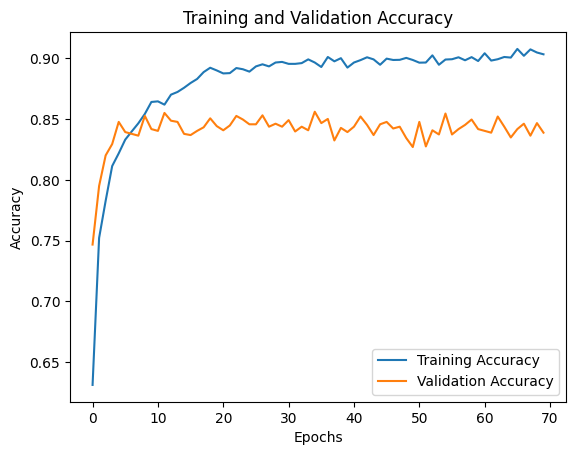

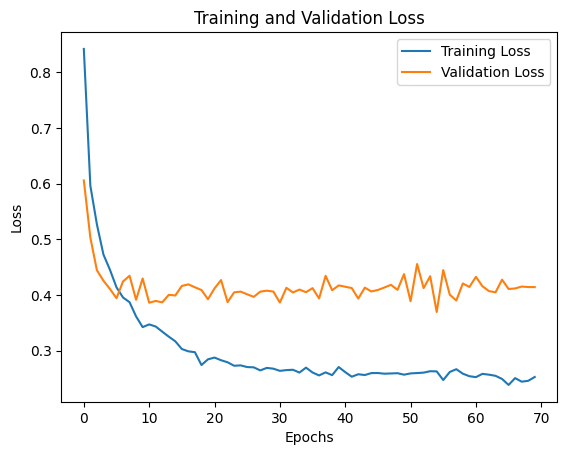

In [71]:
import matplotlib.pyplot as plt

# Affichage accuracy
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Affichage loss
plt.plot(history.history['loss'] + history_finetune.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [5]:
import cv2
import numpy as np
import tensorflow as tf

# Charger le modèle pré-entraîné
try:
    model = tf.keras.models.load_model('model4.h5')
except Exception as e:
    print(f"Erreur lors du chargement du modèle : {e}")
    exit()

# Dictionnaire des émotions
emotion_labels = ['Fatigue', 'tres fatigue', 'neutre']

# Ouvrir la caméra
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Erreur : Impossible d'ouvrir la caméra.")
    exit()

# Chargement du classificateur de visage
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_cascade.empty():
    print("Erreur : Impossible de charger le classificateur de visage.")
    cap.release()
    exit()

last_face = None  # Stocker la dernière position du visage détecté

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erreur : Problème lors de la capture de la vidéo.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) == 0 and last_face is not None:
        faces = [last_face]

    for (x, y, w, h) in faces:
        last_face = (x, y, w, h)
        padding = int(h * 0.5)  # Ajouter un padding autour du visage
        x1, y1 = max(x - padding, 0), max(y - padding, 0)
        x2, y2 = min(x + w + padding, frame.shape[1]), min(y + h + padding, frame.shape[0])

        face = frame[y1:y2, x1:x2]

        if face.shape[0] == 0 or face.shape[1] == 0:
            continue  # Éviter les erreurs de dimension

        face = cv2.resize(face, (150, 150))
        face = face.astype('float32') / 255.0
        face = np.expand_dims(face, axis=0)

        prediction = model.predict(face, verbose=0)
        emotion = emotion_labels[np.argmax(prediction[0])]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
        text_x = max(x1, 10)
        text_y = max(y1 - 10, 20)
        cv2.putText(frame, emotion, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Détection d'émotions", frame)
    
    # Attendre 1 ms pour éviter une utilisation CPU excessive
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
